In [24]:
import matplotlib.pyplot as plt
import numpy as np
  
x = np.arange(-10, 10, 2)
print(x)

[-10  -8  -6  -4  -2   0   2   4   6   8]


In [25]:
def plot_graph(y,ylabel):
    plt.figure()
    plt.plot(x,y, 'o--')
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel(ylabel)
    plt.show()

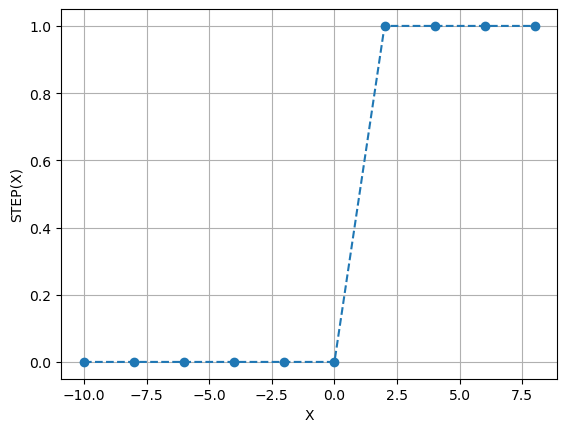

In [26]:
y = list(map(lambda n: 1 if n>0.5 else 0, x))
plot_graph(y,"STEP(X)")

1.STEP FUNCTION

The perceptron network employs the Step activation function. This is typically employed in single-layer networks to provide binary (0 or 1) or bipolar output (-1 or 1). These are known respectively as Binary Step Function and Bipolar Step Function. Here, a function's output is 1 (a neuron will fire) if the input value exceeds a threshold value; otherwise, it is 0 or -1 in the case of a bipolar step function (neuron will not fire).

When an input value crosses a threshold, the step function's output quickly changes from 0 to 1 and is discontinuous. The step function is less suitable for training neural networks using gradient-based optimization methods since the derivative is usually always 0. As a result, updating the network's weights during backpropagation is difficult.

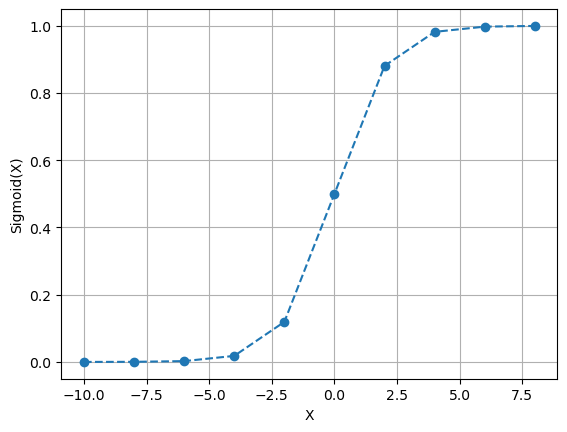

In [27]:
y = 1 / (1 + np.exp(-x))
plot_graph(y, "Sigmoid(X)")

2.SIGMOID FUNCTION

This activation function associates a stream of input data with a range (0, 1). Sigmoid, in contrast to the step function, outputs a range of values instead of just 0 or 1.
The sigmoid function has some drawbacks despite being superior to the ones previously discussed and having its uses (particularly in tasks like binary classification). These drawbacks include the fact that very large and very small input values can interfere with backpropagation because these saturated neurons "kill" the gradients. The output of the sigmoid function is not 0-centered because the range is (0, 1), which is another disadvantage that affects backpropagation. Finally, exponential functions are computationally expensive, which can cause the network to lag.

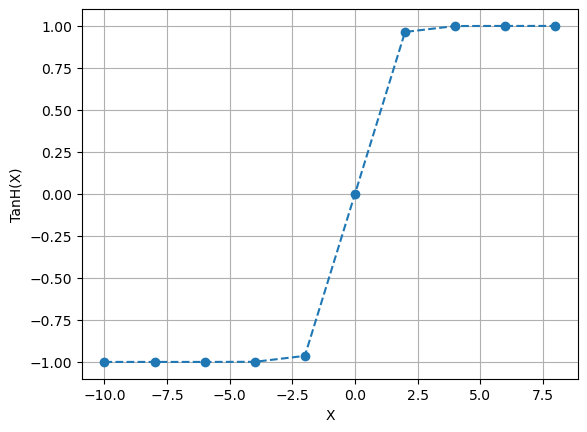

In [28]:
y = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
plot_graph(y, "TanH(X)")

3.TANH FUNCTION

This activation function shares some similarities with the sigmoid in that it similarly converts the input values into an s-shaped curve, however in contrast to the sigmoid, it has a range of (-1, 1) and a center of zero, which addresses one of its drawbacks. Tanh stands for the hyperbolic tangent, which, like the regular tangent, is simply the hyperbolic sine divided by the hyperbolic cosine.

Tanh is an exponential function, therefore while it can be more efficient than the sigmoid, it still has the same challenges with backpropagation when dealing with extremely big or extremely small values as the sigmoid.

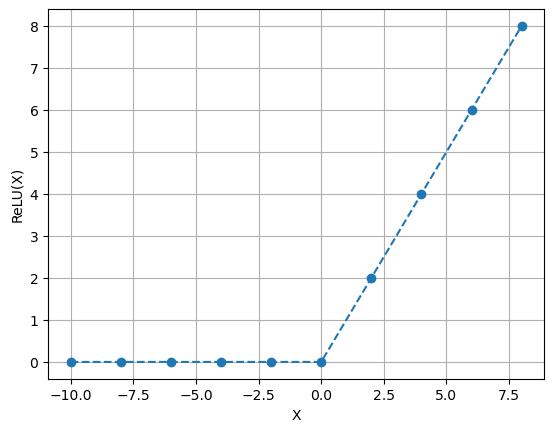

In [29]:
y = list(map(lambda a: a if a>=0 else 0, x))
plot_graph(y,"ReLU(X)")

4.RELU - RECTIFIED LINEAR UNITS

This activation method is more recent and popular. Rectified Linear Unit is what it's called, and it looks like this. ReLU's simplicity is one of its many appealing qualities. As one can see, all it does is leave positive values alone and substitute negative values with 0. This is substantially faster computationally and eliminates the issue of "killing" the gradients of large and small values. Moreover, ReLU-based networks typically converge roughly six times quicker than sigmoid- and tanh-based networks in practice.
ReLU still has some issues, though. The first issue is that it isn't 0-centered, which might be problematic for training. But more crucially, it doesn't really deal with negative inputs in a meaningful way.

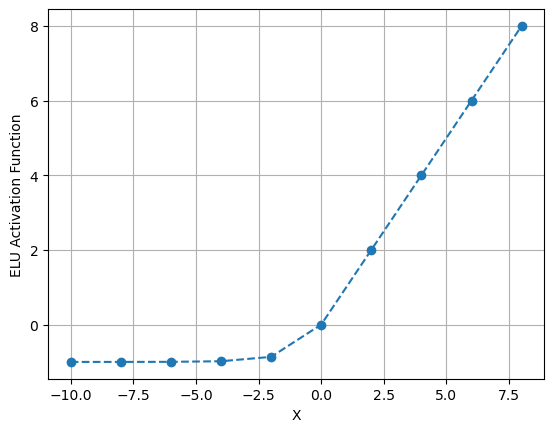

In [30]:
alpha = 1.0

y = np.where(x>=0, x, alpha*(np.exp(x)-1))

plot_graph(y, "ELU Activation Function")

5.ELU - Exponential Linear Unit

The Exponential Linear Unit (ELU) is a neural network activation function. ELUs, in contrast to ReLUs, have negative values, allowing them to, with less computational cost than batch normalization, move mean unit activations closer to zero. Due to a diminished bias shift effect, mean shifts toward zero accelerate learning by bringing the normal gradient closer to the unit natural gradient. Even while LReLUs and PReLUs can be negative, they cannot guarantee a deactivation state that is resistant to noise. With smaller inputs, ELUs saturate to a negative value, which reduces the forward propagated variance and information.

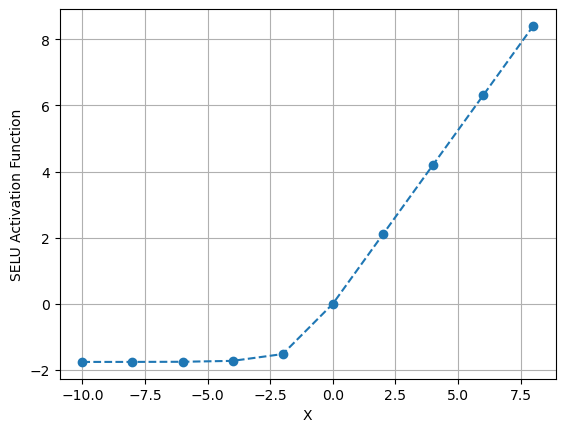

In [31]:
def selu(x, scale=1.0507, alpha=1.6733):
    return np.where(x > 0, scale*x, scale*(alpha*np.exp(x)-alpha))

plot_graph(selu(x), "SELU Activation Function")

SELU - Scaled Exponential Linear Unit

SELUs, or Scaled Exponential Linear Units, are activation functions that induce self-normalization. SELU network neuronal activations automatically converge to a zero mean and unit variance.If x is larger than 0, the output result is x multiplied by lambda. If the input value x is less than or equal to zero, we have a function that goes up to 0, which is our output y, when x is zero. Essentially, when x is smaller than zero, we take the exponential of the x-value minus 1, then we multiply it with alpha α and lambda λ.